In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushealthinsurancedataset/insurance.csv


In [55]:
insurance_df = pd.read_csv("../input/ushealthinsurancedataset/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### DATASET INFERENCE
- NO NULL VALUES IN THE DATASET

# DATA VISUALIZATION

In [59]:
#load the library for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm
import pylab as py

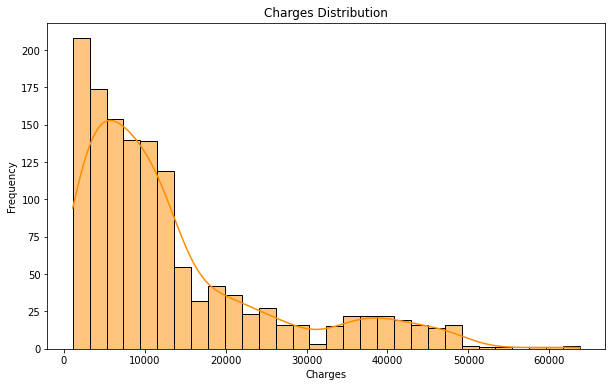

In [60]:
plt.figure(figsize=(10, 6))

sns.histplot(x='charges', data=insurance_df, kde=True, color = 'darkorange')

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [61]:
shapiro(insurance_df['charges'])

ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)

   #### SHAPIRO TEST RESULTS : 
   - The p-value from the shapiro test is > 0.5.
   - Thus the null hypothesis cannot be rejected.
   - We do not have sufficient evidence to say that sample does not come from a normal distribution.

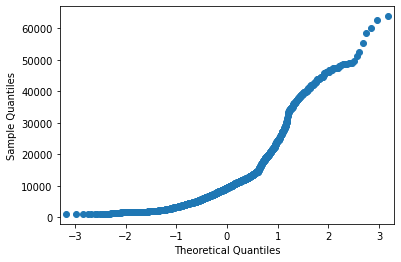

In [62]:
sm.qqplot(insurance_df['charges'], line =None)
plt.show()

#### QQ PLOT RESULTS
  - The QQ Plot clearly shows that the data is not normally distributed.
  - The <kbd>charges</kbd> attribute is right skewed.

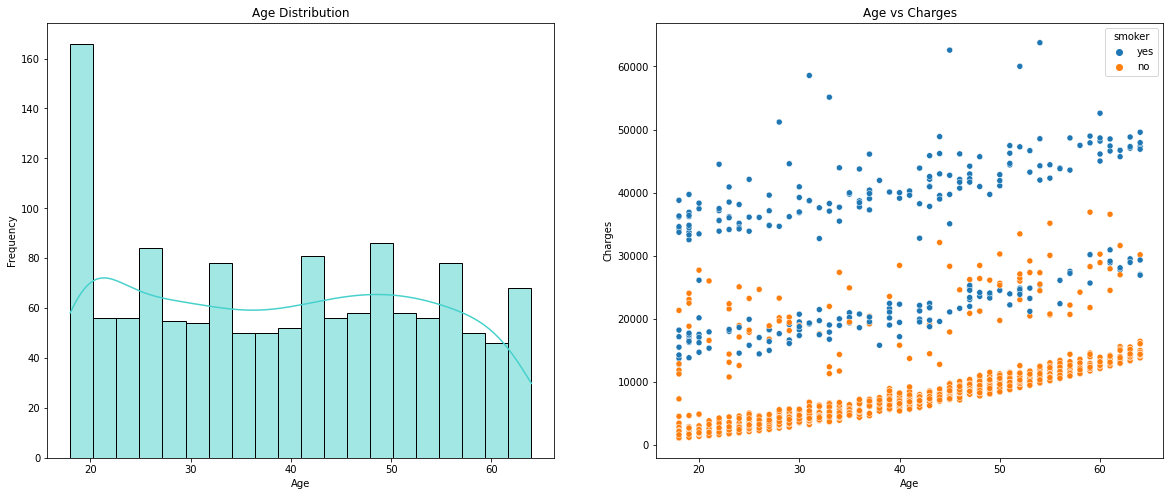

In [63]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(x='age', data=insurance_df, kde=True, color = 'mediumturquoise', bins = 20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.plot()

plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='charges', data=insurance_df, hue='smoker')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.plot()

plt.show()

#### AGE INFERENCES:
- We can see that smoking is common across all ages from 20s to 60s
- The charges increase as the age increases because older people are affected by more diseases.

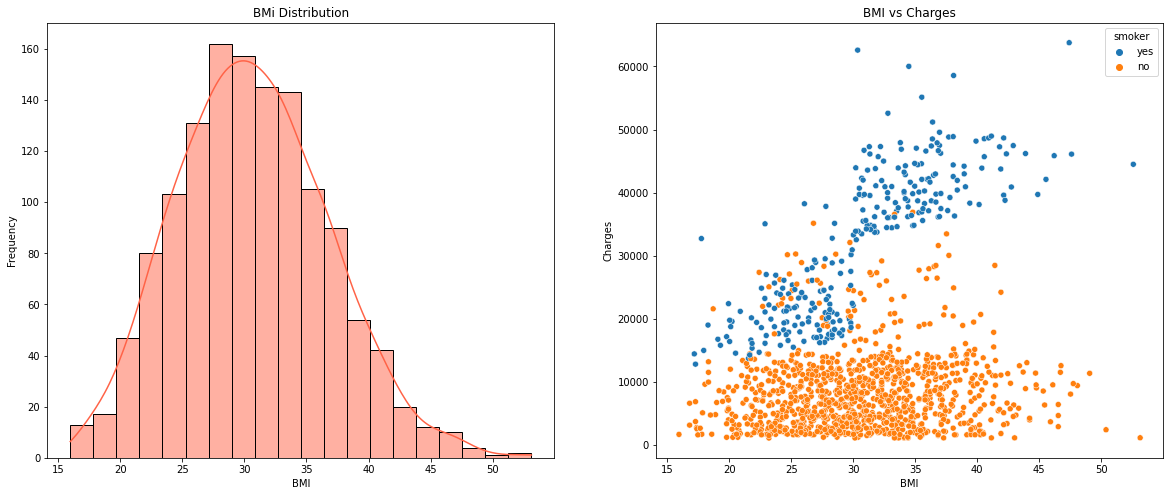

In [64]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=insurance_df, kde=True, color = 'tomato', bins = 20)
plt.title('BMi Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.plot()

plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=insurance_df, hue = 'smoker')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.plot()

plt.show()

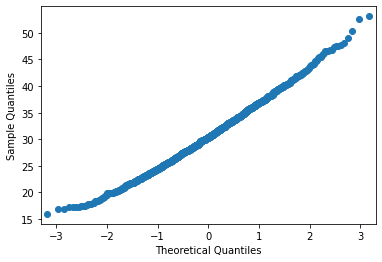

In [65]:
sm.qqplot(insurance_df['bmi'])
plt.show()

#### BMI INFERENCES:
- The <kbd>BMI</kbd> is normally distributed.
- The average <kbd>BMI</kbd> is between 25-30 units in the dataset
- The ideal BMI for an adult is in the range 18.5 to 24.9 units.
- As the BMI increases, the insurance charges also increase.

## PIE CHARTS

Text(0.5, 1.0, 'Pie Chart: Region')

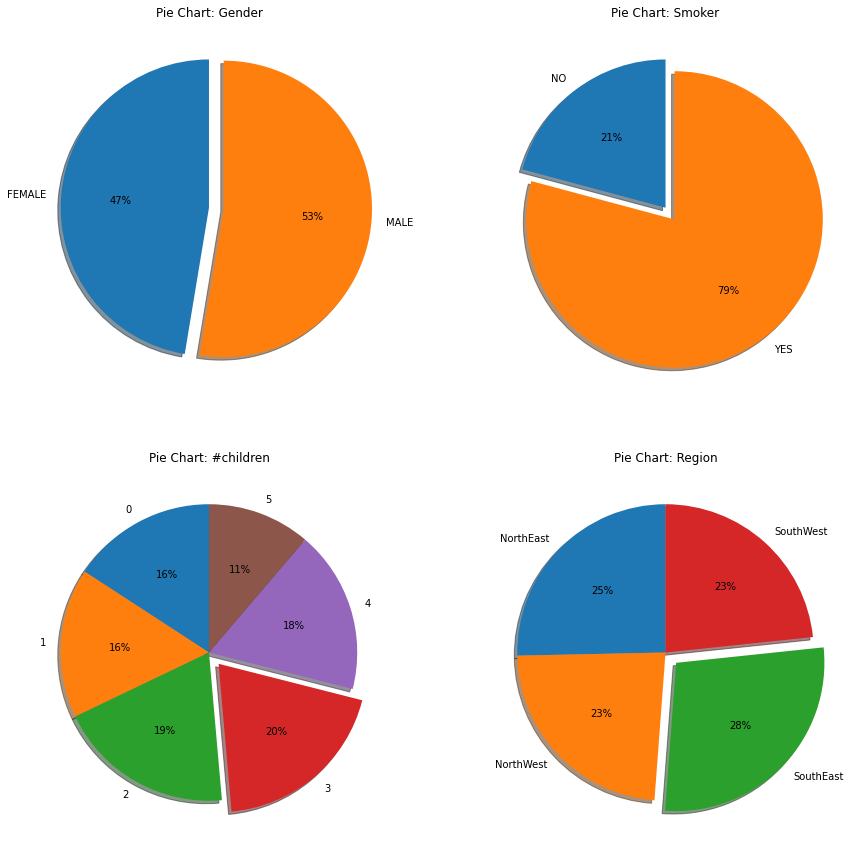

In [66]:
plt.figure(figsize=(15, 15))

explode = (0, 0.1)

plt.subplot(2,2,1)
plt.pie(insurance_df.groupby(['sex']).mean().charges,
        labels=['FEMALE', 'MALE'],
        explode = explode,
        autopct='%.0f%%',
        colors = None,
        startangle=90,
        shadow = True)
plt.title('Pie Chart: Gender')

plt.subplot(2,2,2)
plt.pie(insurance_df.groupby(['smoker']).mean().charges,
        labels=['NO', 'YES'],
        explode = explode,
        autopct='%.0f%%',
        colors = None,
        startangle=90,
        shadow = True)
plt.title('Pie Chart: Smoker')


plt.subplot(2,2,3)
plt.pie(insurance_df.groupby(['children']).mean().charges,
        labels=['0', '1', '2', '3', '4', '5'],
        explode = (0, 0, 0, 0.1, 0, 0),
        autopct='%.0f%%',
        colors = None,
        startangle=90,
        shadow = True)
plt.title('Pie Chart: #children')

plt.subplot(2,2,4)
plt.pie(insurance_df.groupby(['region']).mean().charges,
        labels=['NorthEast', 'NorthWest', 'SouthEast', 'SouthWest'],
        explode = (0, 0, 0.1, 0),
        autopct='%.0f%%',
        colors = None,
        startangle=90,
        shadow = True)
plt.title('Pie Chart: Region')

#### INFERENCES:
- 53% male and 47% female population in the dataset.
- 79% of the clients smoke, while only a minority of 21% does not smoke.
- 30% of the population  has 3 children while 32% have 0-1 child.
- The regions are somewhat equally distributed in the dataset, SouthEast is a bit more than the others by an average of 4%


[Text(0.5, 1.0, 'Mean of Region vs Charges')]

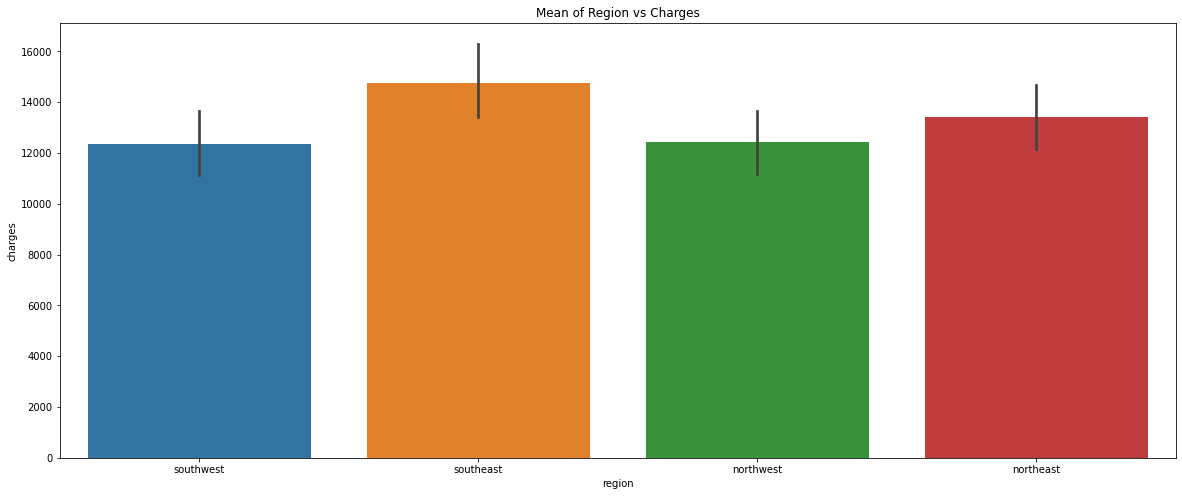

In [67]:
plt.figure(figsize=(20, 8))
sns.barplot(data= insurance_df, x= 'region', y='charges').set(title = 'Mean of Region vs Charges')


#### INFERENCES:
- SouthEast population is paying more than any other region.

## BOXPLOTS

<AxesSubplot:xlabel='region', ylabel='charges'>

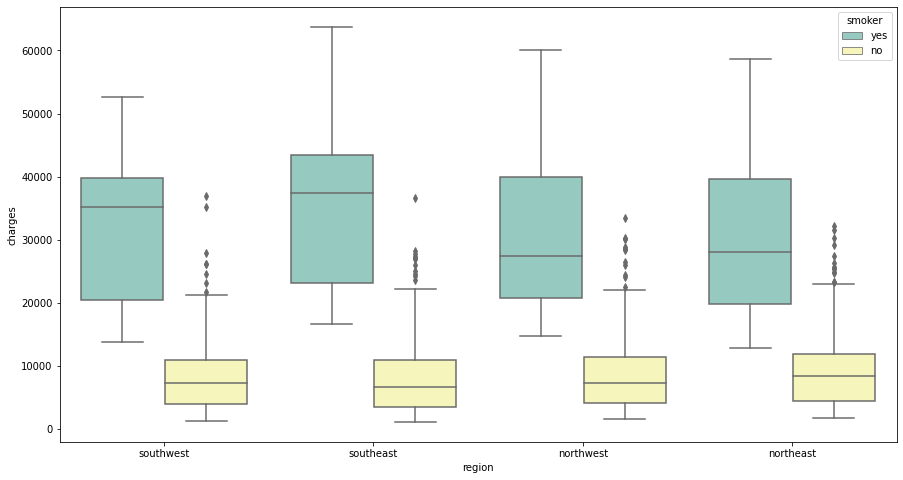

In [68]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="region", y="charges", hue="smoker", data=insurance_df, palette="Set3")

[]

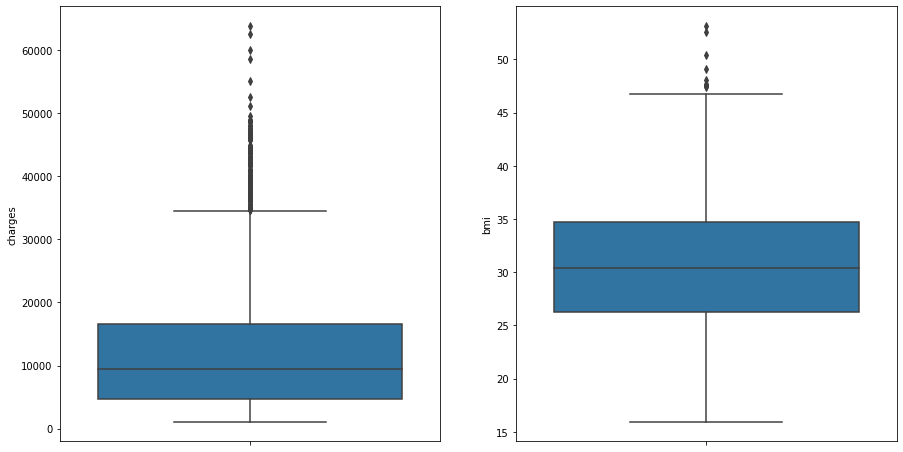

In [69]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.boxplot(data= insurance_df, y= 'charges')
plt.plot()

plt.subplot(1,2,2)
sns.boxplot(data= insurance_df, y= 'bmi')
plt.plot()


#### INFERENCES:
- Outliers are present in <kbd>charges</kbd> and <kbd>bmi</kbd>

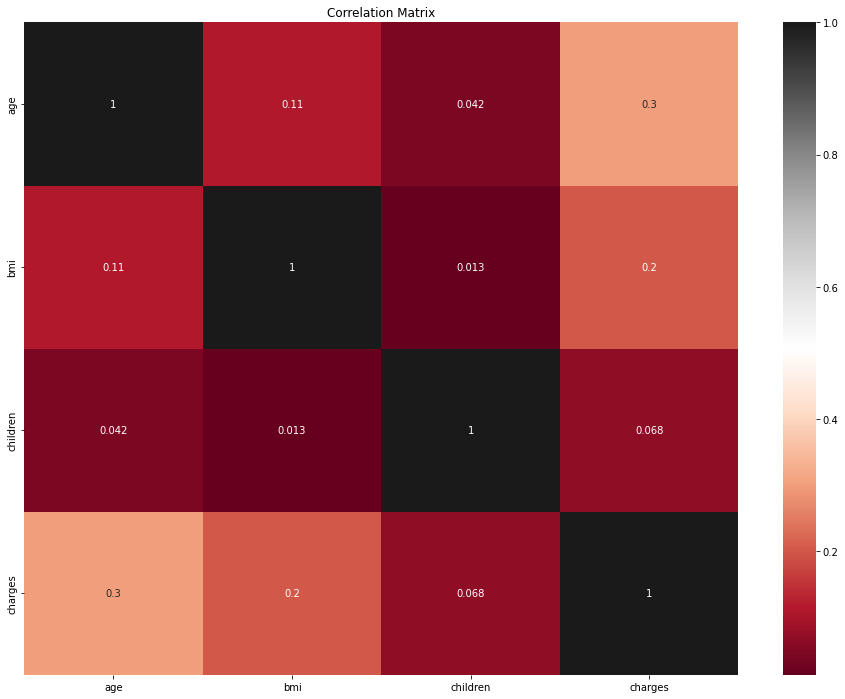

In [70]:
correlations = insurance_df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="RdGy", annot=True)
plt.title("Correlation Matrix")
plt.show()

## FEATURE ENGINEERING

In [71]:
#load the one-hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

In [72]:
encoder_sex = OneHotEncoder().fit(insurance_df[['sex']])
encoder_smoker = OneHotEncoder().fit(insurance_df[['smoker']])
encoder_region = OneHotEncoder().fit(insurance_df[['region']])

In [73]:
sex_values = encoder_sex.transform(insurance_df[['sex']])

smoker_values = encoder_smoker.transform(insurance_df[['smoker']])

region_values = encoder_region.transform(insurance_df[['region']])


In [74]:
insurance_df[['Gender_F','Gender_M']] = sex_values.toarray()
insurance_df[['Non-Smoker','Smoker']] = smoker_values.toarray()
insurance_df[['NorthEast','NorthWest','SouthEast','SouthWest']] = region_values.toarray()

insurance_df

,age,sex,bmi,children,smoker,region,charges,Gender_F,Gender_M,Non-Smoker,Smoker,NorthEast,NorthWest,SouthEast,SouthWest
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [75]:
#Dropping old columns after one-hot encoding
insurance_df.drop(columns=["sex","smoker","region"],inplace=True)

insurance_df

,age,bmi,children,charges,Gender_F,Gender_M,Non-Smoker,Smoker,NorthEast,NorthWest,SouthEast,SouthWest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## FEATURE SCALING

In [76]:
#load StandardScalar from sklearn
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
scaler.fit(insurance_df[['age']])
insurance_df['age'] = scaler.transform(insurance_df[['age']])

scaler.fit(insurance_df[['bmi']])
insurance_df['bmi'] = scaler.transform(insurance_df[['bmi']])

scaler.fit(insurance_df[['children']])
insurance_df['children'] = scaler.transform(insurance_df[['children']])

insurance_df

,age,bmi,children,charges,Gender_F,Gender_M,Non-Smoker,Smoker,NorthEast,NorthWest,SouthEast,SouthWest
0,-1.438764,-0.453320,-0.908614,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


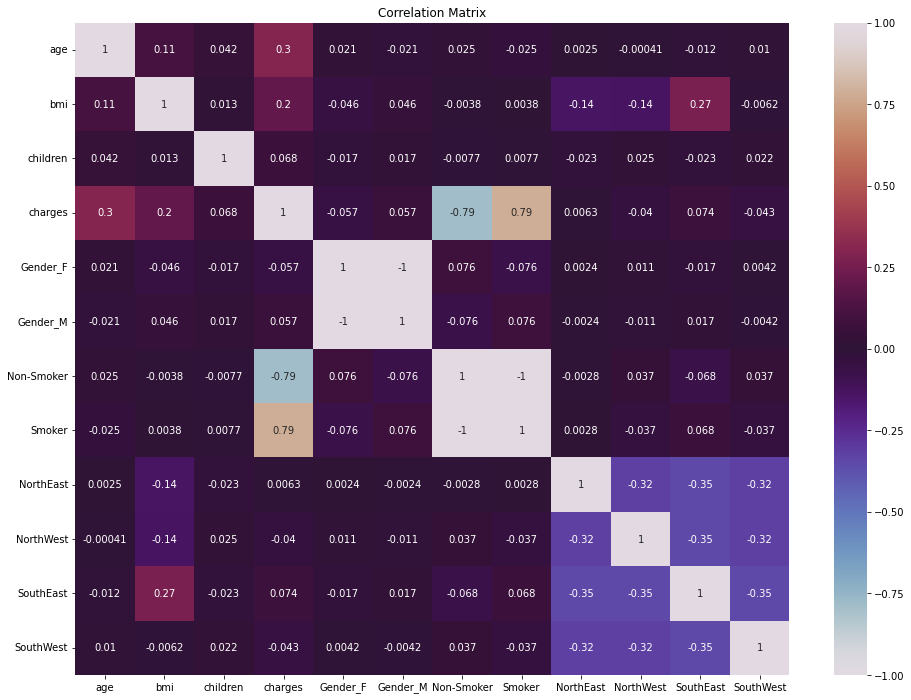

In [78]:
correlations = insurance_df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="twilight", annot=True)
plt.title("Correlation Matrix")
plt.show()

## CHOSING OPTIMAL MODEL

In [79]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [80]:
#Best selection method based on RSS
#some helper function 
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [81]:
#import tqdm for progress bar 
from tqdm import tnrange, tqdm_notebook
import itertools

#Initialize variables 
y = insurance_df.charges
X = insurance_df.drop(columns='charges',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 12 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,
                   'RSS': RSS_list,
                   'R_squared':R_squared_list,
                   'Adj_R_squared': adj_R_squared_list,
                   'features':feature_list})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  app.launch_new_instance()


Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

### FINDING THE BEST SUBSET USING RSS

In [82]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
df_max_adj = df[df.groupby('numb_features')['Adj_R_squared'].transform(max) == df['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head(10))

,numb_features,RSS,R_squared,Adj_R_squared,features
5,1,7.455432e+10,0.619765,0.619480,"(Non-Smoker,)"
6,1,7.455432e+10,0.619765,0.619480,"(Smoker,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, Smoker)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, Non-Smoker)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, Non-Smoker)"


,numb_features,RSS,R_squared,Adj_R_squared,features
5,1,7.455432e+10,0.619765,0.619480,"(Non-Smoker,)"
6,1,7.455432e+10,0.619765,0.619480,"(Smoker,)"
16,2,5.462612e+10,0.721401,0.720983,"(age, Smoker)"
69,3,4.951322e+10,0.747477,0.746909,"(age, bmi, Non-Smoker)"
70,3,4.951322e+10,0.747477,0.746909,"(age, bmi, Smoker)"
233,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, Non-Smoker)"
234,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, Smoker)"
575,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, Non-Smoker, NorthEast)"
579,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, Smoker, NorthEast)"
1063,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, Non-Smoker, NorthEast, No..."


In [83]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared
0,1,1.785440e+11,0.089406,0.088724,"(age,)",7.455432e+10,0.619765
1,1,1.883608e+11,0.039339,0.038620,"(bmi,)",7.455432e+10,0.619765
2,1,1.951676e+11,0.004624,0.003879,"(children,)",7.455432e+10,0.619765
3,1,1.954306e+11,0.003282,0.002536,"(Gender_F,)",7.455432e+10,0.619765
4,1,1.954306e+11,0.003282,0.002536,"(Gender_M,)",7.455432e+10,0.619765


In [84]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df['max_Adj_R_squared'] = df.groupby('numb_features')['Adj_R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared,max_Adj_R_squared
0,1,1.785440e+11,0.089406,0.088724,"(age,)",7.455432e+10,0.619765,0.61948
1,1,1.883608e+11,0.039339,0.038620,"(bmi,)",7.455432e+10,0.619765,0.61948
2,1,1.951676e+11,0.004624,0.003879,"(children,)",7.455432e+10,0.619765,0.61948
3,1,1.954306e+11,0.003282,0.002536,"(Gender_F,)",7.455432e+10,0.619765,0.61948
4,1,1.954306e+11,0.003282,0.002536,"(Gender_M,)",7.455432e+10,0.619765,0.61948


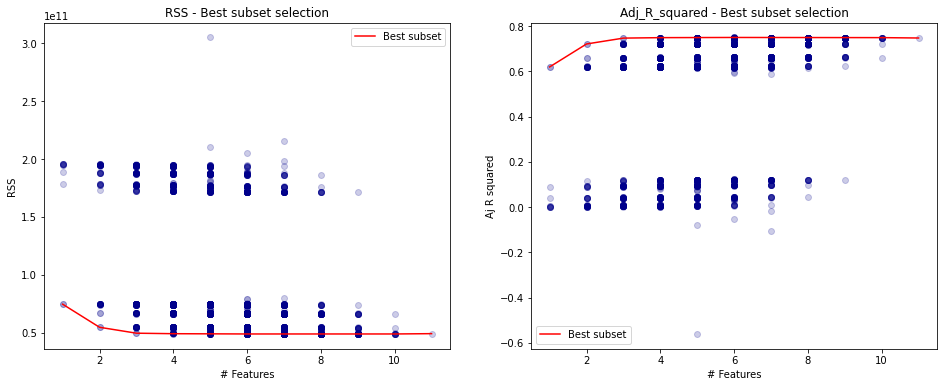

In [85]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.Adj_R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_Adj_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('Aj R squared')
ax.set_title('Adj_R_squared - Best subset selection')
ax.legend()

plt.show()

#### INFERENCES:
- By observing these plots we can chose m = 4.
- The features part of the linear regression model will be (age, bmi, children, Smoker)

## MODEL IMPLEMENTATION

### LINEAR REGRESSION

In [86]:
#modeling
from sklearn.model_selection import train_test_split

X = insurance_df[['age', 'bmi', 'children', 'Smoker']]
y = insurance_df.charges

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [87]:
model = LinearRegression() 
model.fit(Xtrain,ytrain)  

LinearRegression()

In [88]:
def adj_r_sqr(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [89]:
adj_r_sqr(Xtrain,ytrain,Xtest,ytest)

(0.7483763268900268, 0.7452361397651727)

In [90]:
model.score(Xtrain,ytrain)

0.7493178560691098

In [91]:
model.score(Xtest,ytest)

0.7490528268098892

In [92]:
yhat = model.predict(Xtest)
results= pd.DataFrame({"y":ytest,"yhat":yhat})
results.head()

,y,yhat
285,7742.1098,8949.281088
1247,6059.1730,7825.939872
358,1837.2819,7259.738938
177,10436.0960,11911.974597
144,20745.9891,30143.855761


### LASSO REGRESSION

In [93]:
#load lasso regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [94]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [96]:
def adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [97]:
adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest)

(0.746337434413875, 0.7540551384444878)

#### INFERENCES:

- <kbd>Linear Regression</kbd>
   - Train Set Accuracy : **75.44%**
   - Test  Set Accuracy : **73.02%**
  <br></br>
- <kbd>Lasso Regression</kbd>
   - Train Set Accuracy : **75.42%**
   - Test  Set Accuracy : **71.99%**